# This notebook goes through some of the exploratory data analysis of the Kaggle Spotify dataset with Python.

## Aim: To Analyze Genre with rest of the data on Top 50 Spotify Songs – 2019

In [1]:
#Import all the relevant dependencies and libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd
from scipy import stats

# Import Dependencies
%matplotlib inline

from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import Visualization 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.express as px
import mplcyberpunk
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'mplcyberpunk'

**Top 50 songs listened in 2019 on Spotify dataset contains name of Artists, Genre, and other 11 variables.**
*     Let us convert the data into pandas’ readable format by encoding to 'ISO-8859-1'

In [2]:
#Importing data

filename='/kaggle/input/top50spotify2019/top50.csv'
spotify_df=pd.read_csv(filename,encoding='ISO-8859-1',index_col=0)
spotify_df.head() 

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
spotify_df.info() #lets explore data type.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track.Name        50 non-null     object
 1   Artist.Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats.Per.Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness..dB..    50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence.          50 non-null     int64 
 9   Length.           50 non-null     int64 
 10  Acousticness..    50 non-null     int64 
 11  Speechiness.      50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.5+ KB


In [4]:
spotify_df.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [5]:
#Lets reduce the number of decimal places to 2
pd.set_option('precision', 2)
spotify_df.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,120.06,64.06,71.38,-5.66,14.66,54.60,200.96,22.16,12.48,87.50
std,30.90,14.23,11.93,2.06,11.12,22.34,39.14,19.00,11.16,4.49
min,85.00,32.00,29.00,-11.00,5.00,10.00,115.00,1.00,3.00,70.00
25%,96.00,55.25,67.00,-6.75,8.00,38.25,176.75,8.25,5.00,86.00
50%,104.50,66.50,73.50,-6.00,11.00,55.50,198.00,15.00,7.00,88.00
75%,137.50,74.75,79.75,-4.00,15.75,69.50,217.50,33.75,15.00,90.75
max,190.00,88.00,90.00,-2.00,58.00,95.00,309.00,75.00,46.00,95.00


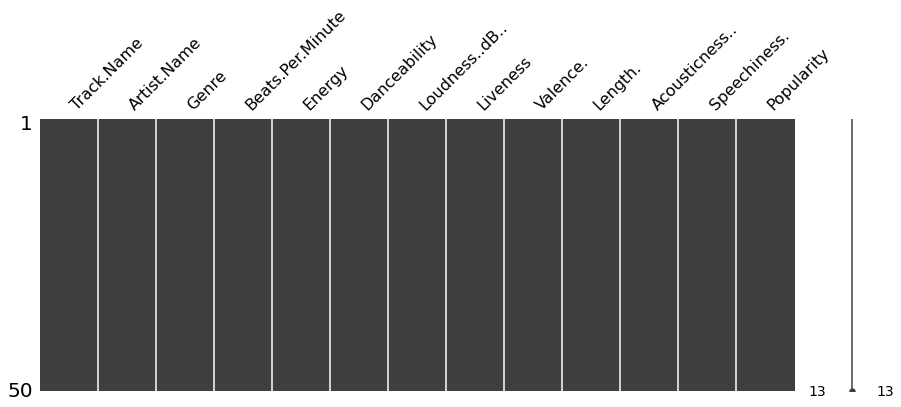

In [6]:
#Finding the missing values
# Plot graphic of missing values
msno.matrix(spotify_df, figsize = (15,5))

* All column are complete an no empty cells can be found.

In [7]:
spotify_df.describe(include = ['O'])

,Track.Name,Artist.Name,Genre
count,50,50,50
unique,50,38,21
top,Sucker,Ed Sheeran,dance pop
freq,1,4,8


* All track values are unique across the dataset
* Artist Names have several dupicates which means several artists have more than one track.

**Analyzing and visualizing data by pivoting features**

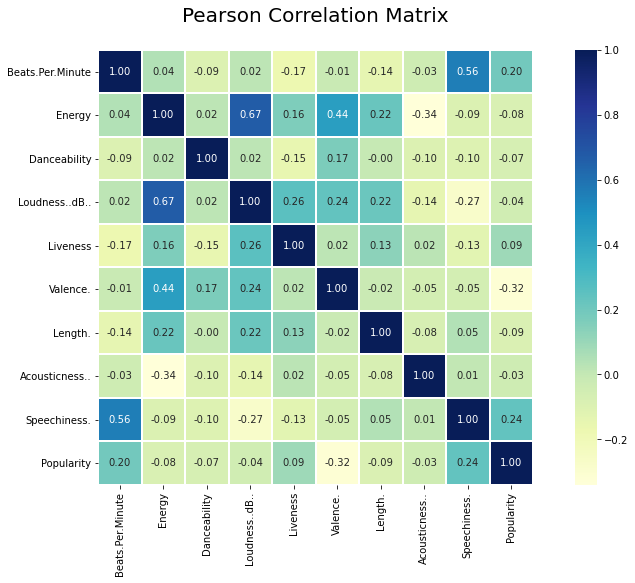

In [8]:
#Understanding Correlation between variables
plt.figure(figsize=(15,8))
sns.heatmap(spotify_df.corr(), annot=True, square = True, cmap="YlGnBu", linewidths=1, fmt= '.2f')
plt.title('Pearson Correlation Matrix\n',fontsize=20);

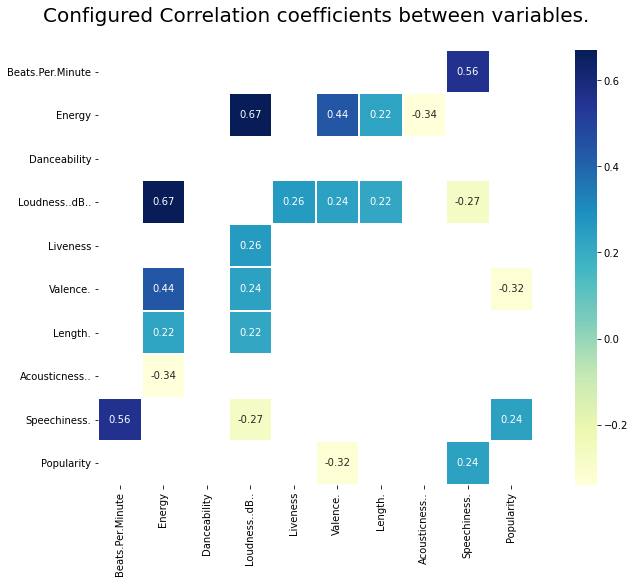

In [9]:
plt.figure(figsize=(15,8))
correl = spotify_df.corr()
sns.heatmap(correl[((correl >= 0.2) | (correl <= -0.2)) & (correl != 1)], annot=True, linewidths=1, fmt= '.2f', square = True, cmap="YlGnBu")
plt.title('Configured Correlation coefficients between variables.\n',fontsize=20);

Slightly positive correlation can be found between Loudness and Energy.

![](http://)

Text(0.5, 0, 'Popularity')

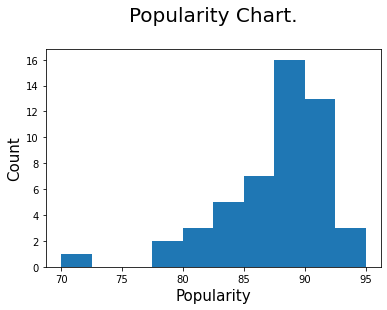

In [10]:
# Plotting a histogram to show the original data distribution 
plt.hist(spotify_df['Popularity'],bins=10)
plt.title('Popularity Chart.\n',fontsize=20);
plt.ylabel('Count', fontsize=15)
plt.xlabel("Popularity", fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

Text(18.168967013888896, 0.5, 'Frequency')

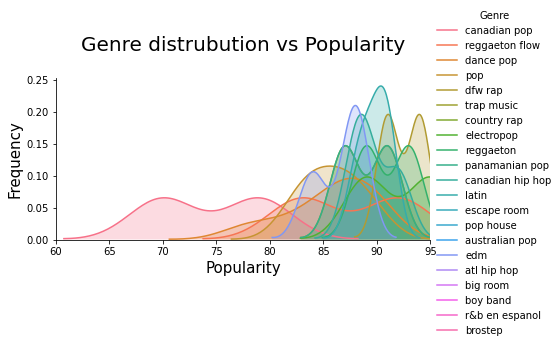

In [11]:
#Analysing Genre Vs Popularity

sns.FacetGrid(spotify_df, hue="Genre",aspect=2)\
.map(sns.kdeplot,'Popularity',shade= True)\
.set(xlim=(60, spotify_df['Popularity'].max()))\
.add_legend()

plt.xlabel("Popularity", fontsize=15)
plt.title('Genre distrubution vs Popularity\n', fontsize=20)
plt.ylabel('Frequency', fontsize=15)

In [12]:
#Genre and Number of songs in that Genre.
#Representing using Pie chart
fig = px.pie(spotify_df, values = 'Popularity', names='Genre', hole = 0.5)
fig.update_layout(annotations=[dict(text='Genre',font_size=20, showarrow=False)])
fig.show()

**Dance Pop and Pop are two most listed Genre in the top 50**

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



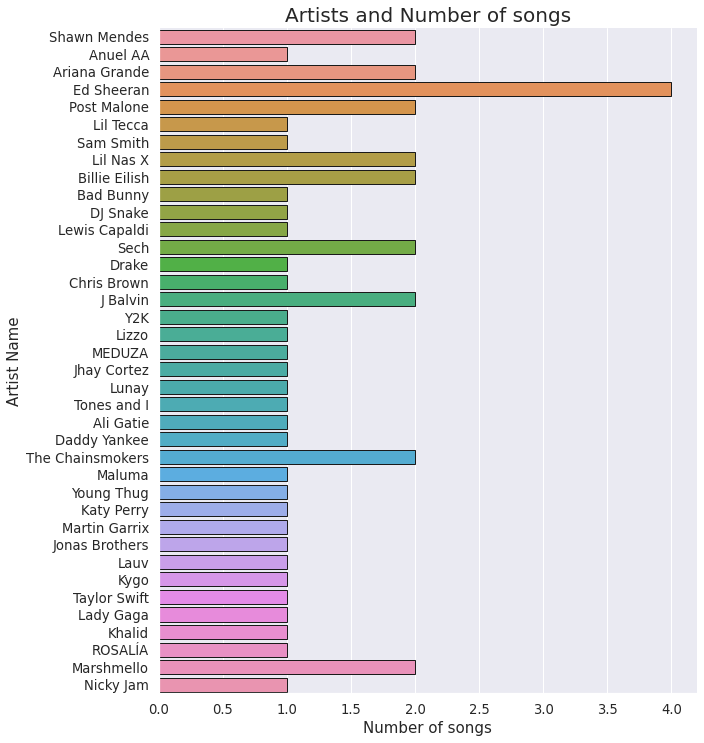

In [13]:
#Artists and Number of songs by each artists in database.
sns.set(font_scale = 1.2)
ab = sns.catplot(y = "Artist.Name", kind = "count", edgecolor = ".1", data = spotify_df, aspect=1, size=10)
plt.ylabel('Artist Name', fontsize=15)
plt.xlabel("Number of songs", fontsize=15)
plt.title("Artists and Number of songs", fontsize=20);
#plt.show()


**Ed Sheeran has more number of songs in the Top 50**

In [14]:
#Finding Most Popular aritist using word cloud

allSongs = [trackname for trackname in spotify_df['Artist.Name']]
wc_dict = Counter(allSongs)

wordcloud = WordCloud(width=1000, height=500, background_color = 'white', collocations=False).generate_from_frequencies(wc_dict)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud)
plt.axis('off');

NameError: name 'Counter' is not defined

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 62.499999999999915, 'Beats.Per.Minute')

<Figure size 1080x1080 with 0 Axes>

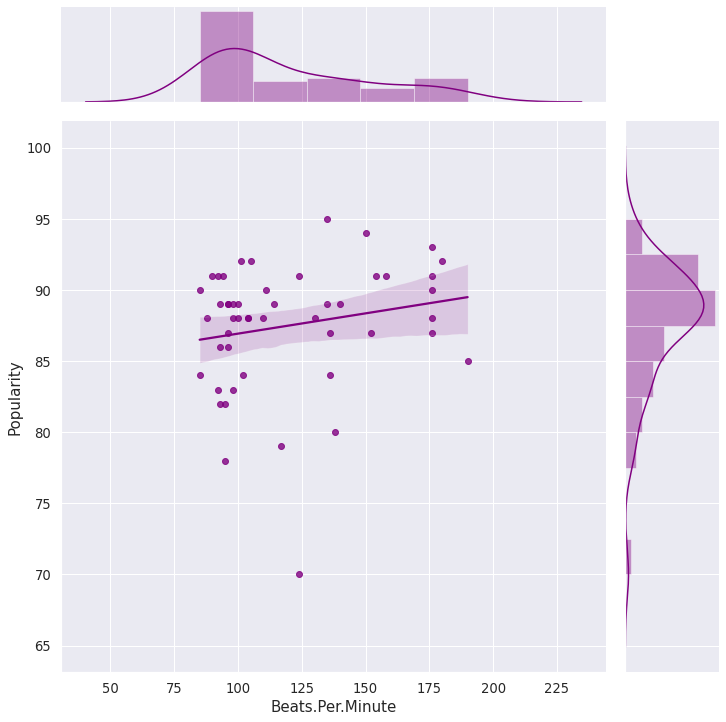

In [15]:
#Corelation between Beats.Per.Minute and Popularity
#Ploting data and a linear regression model fit.

plt.figure(figsize=(15,15))
sns.jointplot(x=spotify_df["Beats.Per.Minute"].values, y=spotify_df['Popularity'].values, size=10, kind="reg",color='Purple')
plt.ylabel('Popularity', fontsize=15)
plt.xlabel("Beats.Per.Minute", fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kern

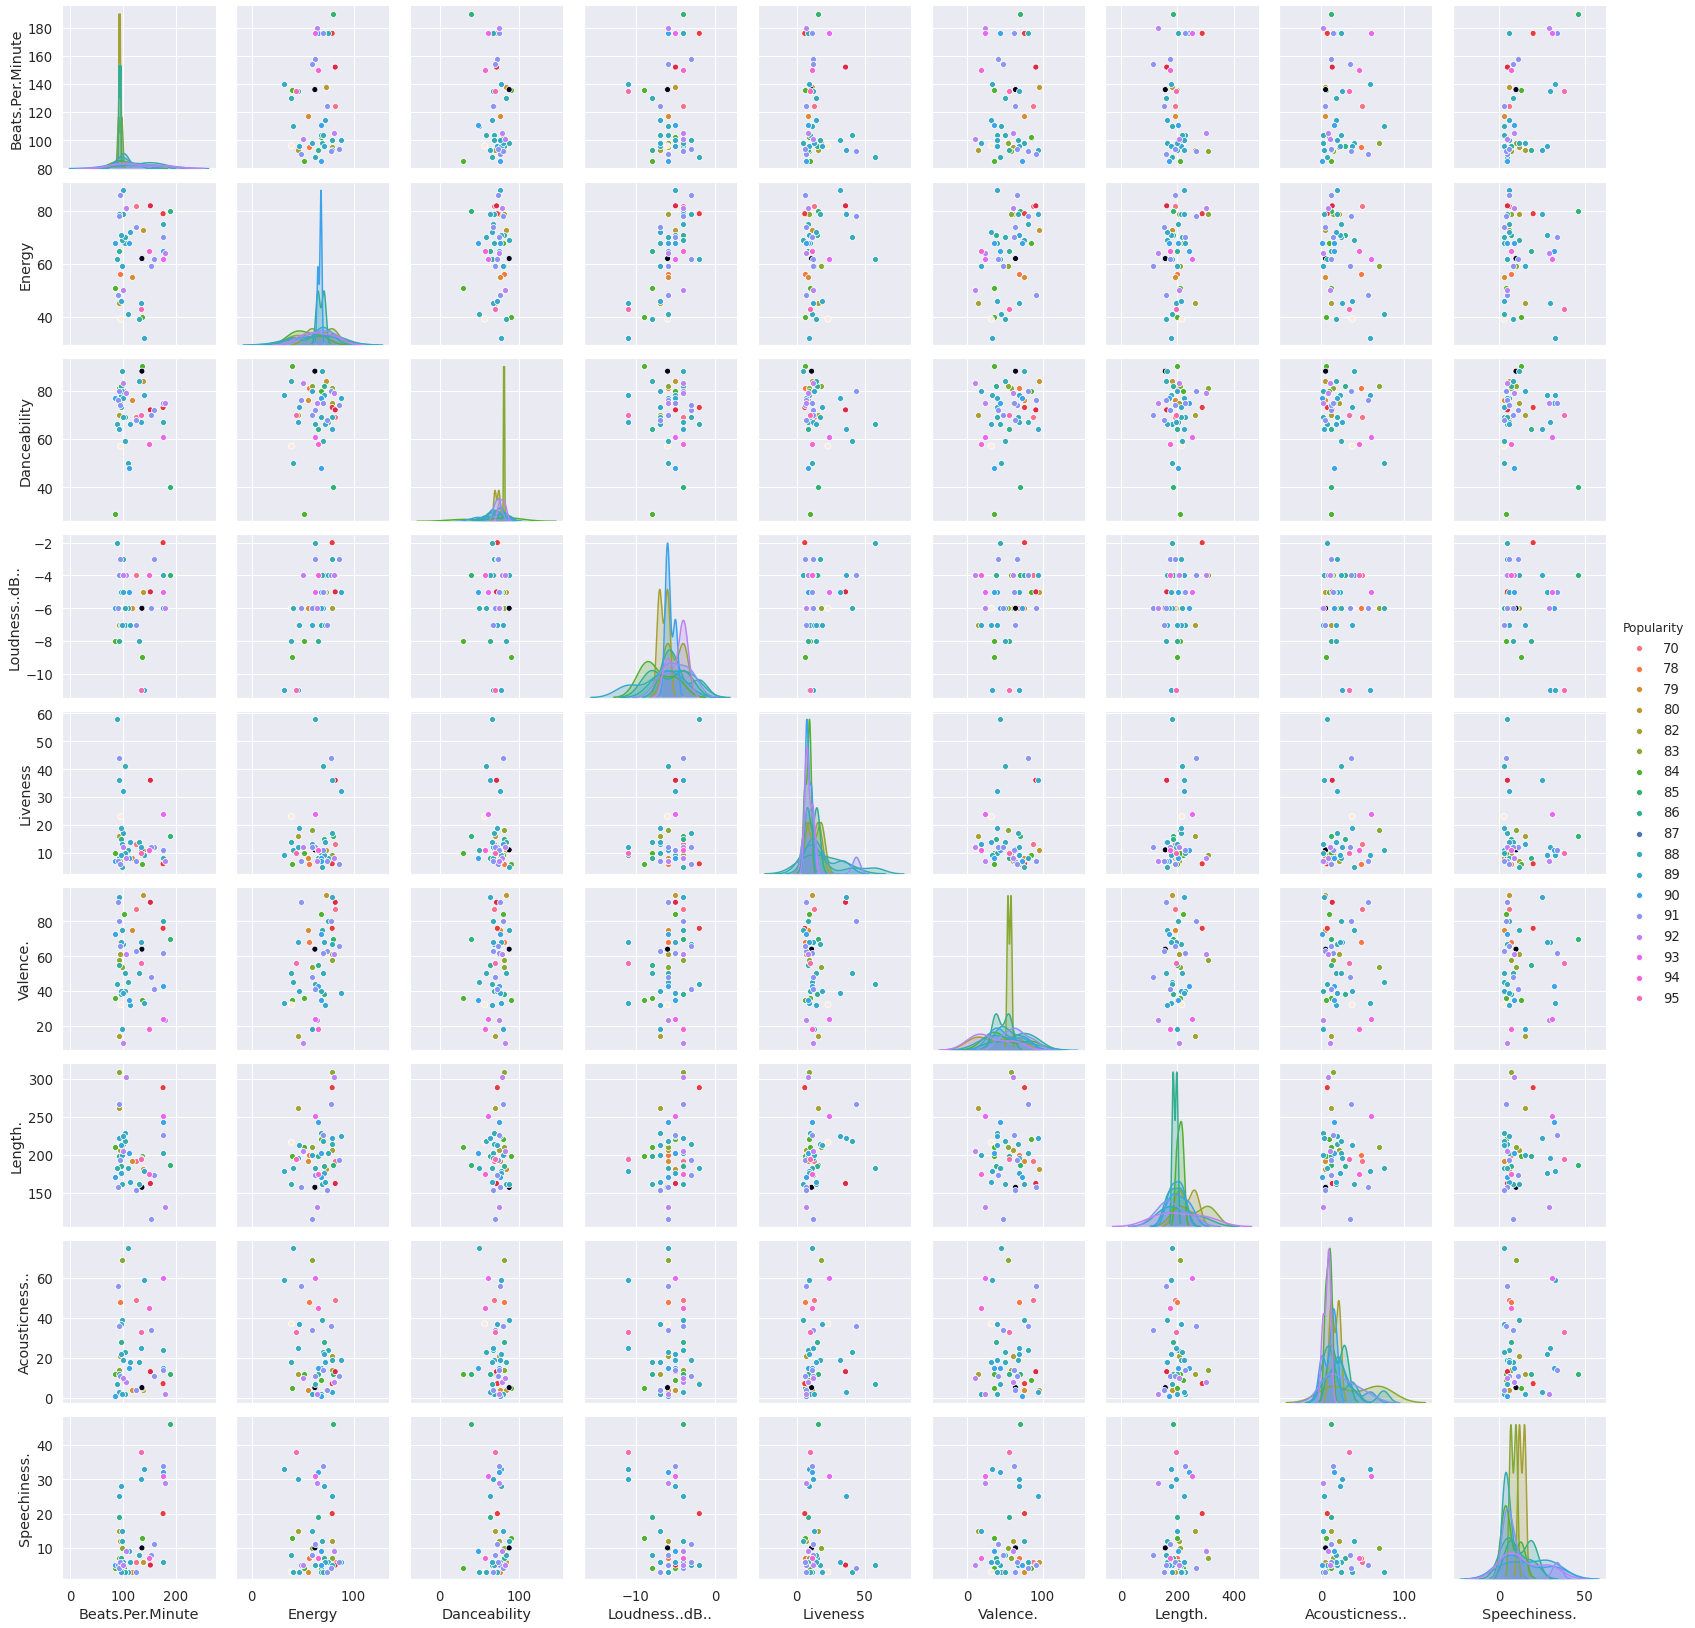

In [16]:
sns.pairplot(spotify_df, hue="Popularity")

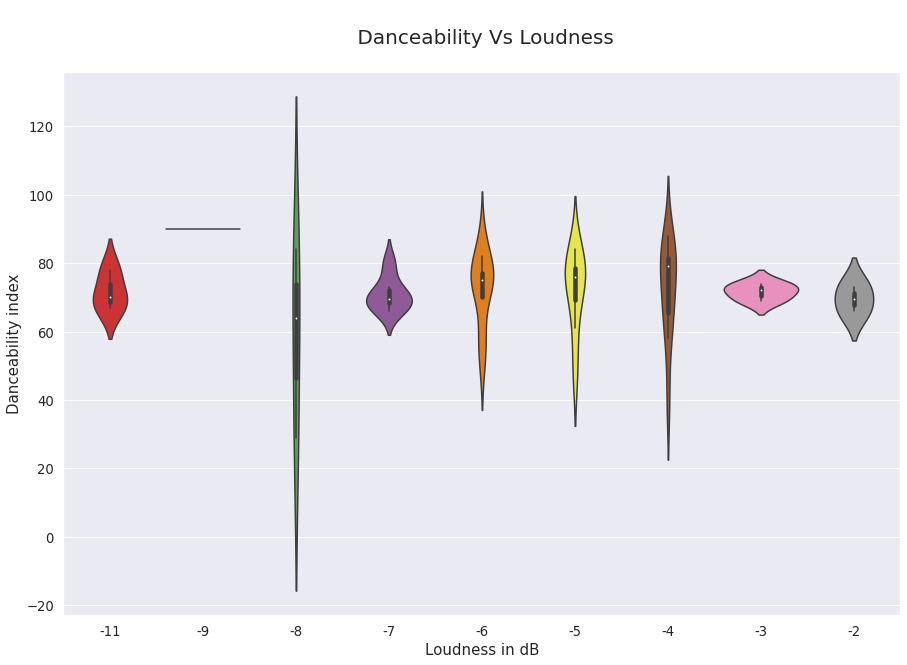

In [17]:
#Corelation between Loudness and Danceability
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,10))
sns.violinplot(x='Loudness..dB..', y='Danceability', data=spotify_df, palette="Set1")
plt.xlabel('Loudness in dB', fontsize=15)
plt.ylabel('Danceability index', fontsize=15)
plt.title("\n Danceability Vs Loudness\n", fontsize=20);

In [18]:
#Plot top 10 songs based on Popularity using mplcyberpunk
plt.style.use('cyberpunk')
plt.figure(figsize = (8, 10))
top10 = spotify_df.sort_values(by=['Popularity'],ascending=False).head(10)
ax = sns.barplot(data = top10, y = 'Track.Name', x= 'Popularity');
mplcyberpunk.add_glow_effects(ax)

plt.xlabel('Popularity', fontsize=15)
plt.ylabel('Track Name', fontsize=15)
plt.title("\n Top 10 songs based on Popularity \n", fontsize=20);

OSError: 'cyberpunk' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

**Bad Guy by Billie Eilish. Gener Electropop is the most Popular track**

In [19]:
# Analysing Danceability of each track
plt.style.use('cyberpunk')
plt.figure(figsize = (25, 5))
sns.pointplot(data = spotify_df, x = 'Track.Name',y = 'Danceability',hue = 'Popularity', palette = 'inferno');
plt.xticks(rotation = 90)
plt.ylabel('Danceability', fontsize=15)
plt.xlabel('Track Name', fontsize=15)
plt.title("\n Analysing Danceability of each track \n", fontsize=20);
plt.legend(loc='lower right')
mplcyberpunk.add_glow_effects()

OSError: 'cyberpunk' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [20]:
# Finding the correlation between Energy, Acousticness and Loudness of the song
fig = go.Figure(data = [go.Scatter3d(
    x = spotify_df['Energy'],
    y = spotify_df['Loudness..dB..'],
    z = spotify_df['Acousticness..'],
    text = spotify_df['Track.Name'], #pointer
    mode = 'markers',
    marker = dict(
    color = spotify_df['Popularity'],
    colorbar_title = 'Popularity',
    colorscale = 'aggrnyl'
    )
)])

# Set variables and size
fig.update_layout(width=800, height=800, title = 'Correlation between Energy, Acousticness and Loudness of the song',
                  scene = dict(xaxis=dict(title='Energy'),
                               yaxis=dict(title='Loudness'),
                               zaxis=dict(title='Acousticness')
                               )
                 )

fig.show()

NameError: name 'go' is not defined

In [21]:
# Finding the correlation between Danceability, Liveness and Valence of the song
fig = go.Figure(data = [go.Scatter3d(
    x = spotify_df['Danceability'],
    y = spotify_df['Liveness'],
    z = spotify_df['Valence.'],
    text = spotify_df['Track.Name'], #pointer
    mode = 'markers',
    marker = dict(
    color = spotify_df['Popularity'],
    colorbar_title = 'Popularity',
    colorscale = 'agsunset'
    )
)])

# Set variables and size
fig.update_layout(width=800, height=800, title = 'Correlation between Danceability, Liveness and Valence of the song',
                  scene = dict(xaxis=dict(title='Danceability'),
                               yaxis=dict(title='Liveness'),
                               zaxis=dict(title='Valence')
                               )
                 )

fig.show()

NameError: name 'go' is not defined

In [22]:
#Trying to understand if length of the song varies due to Speechiness
fig = px.histogram(spotify_df,
                   x="Speechiness.",
                    y="Length.",
                  opacity = 1,
                  title = 'Length of the song Vs Speechiness',
                  color = 'Artist.Name')
fig.show()

# Predicting popularity of the songs

In [23]:
# Retaining all numeric columns
Sfy_df_pre = spotify_df.drop(['Track.Name', 'Artist.Name', 'Genre'], axis = 1)
Sfy_df_pre.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,117,55,76,-6,8,75,191,4,3,79
2,105,81,79,-4,8,61,302,8,9,92
3,190,80,40,-4,16,70,186,12,46,85
4,93,65,64,-8,8,55,198,12,19,86
5,150,65,58,-4,11,18,175,45,7,94


In [24]:
#Predictive Modelling with outliers
X = Sfy_df_pre.iloc[: , :-1] # Asigning all rows and all columns without popularity
y = Sfy_df_pre.iloc[:, -1] # Asigning Popularity values

In [25]:
# Spliting the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

**Theil-Sen Estimator: robust multivariate regression model.**

The algorithm calculates least square solutions on subsets with size n_subsamples of the samples in X. Any value of n_subsamples between the number of features and samples leads to an estimator with a compromise between robustness and efficiency. Since the number of least square solutions is “n_samples choose n_subsamples”, it can be extremely large and can therefore be limited with max_subpopulation. If this limit is reached, the subsets are chosen randomly. In a final step, the spatial median (or L1 median) is calculated of all least square solutions.

In [26]:
#Using Theil-Sen Regression model.
TSReg = TheilSenRegressor() #Define Model
TSReg.fit(X_train, y_train) #Fit Model
y_pred = TSReg.predict(X_test) #Get Predictions
print('\nOrginal Value \t Predicted Value')
for (orgVal, predVal) in zip(y_test, y_pred):
     print(f"\t{orgVal}\t\t{predVal:.2f}")

#Checking the accuracy of Theil-Sen Regression model
print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Orginal Value 	 Predicted Value
	87		86.16
	78		87.20
	84		86.55
	88		88.32
	91		86.58
	88		87.34
	83		89.23
	70		88.46
	89		90.04
	91		89.35

Mean Absolute Error: 4.537037404209036
Mean Squared Error: 49.518962237053955
Root Mean Squared Error: 7.036971098210789


Text(0, 0.5, 'Test values')

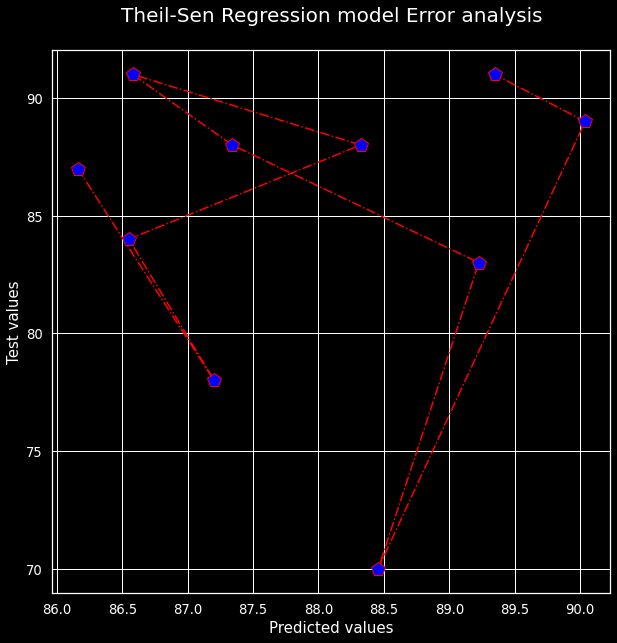

In [27]:
#Theil-Sen Regression model Error analysis
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='Red',linestyle='dashdot',marker='p',markerfacecolor='blue',markersize=15)
plt.title('Theil-Sen Regression model Error analysis\n',fontsize=20)
plt.xlabel('Predicted values',fontsize=15)
plt.ylabel('Test values',fontsize=15)

In [28]:
#Using XGB Regression model.
        
XGBReg = XGBRegressor()
XGBReg.fit(X_train, y_train)
y_pred = XGBReg.predict(X_test)
print('Orginal Value \t Predicted Value')
for (orgVal, predVal) in zip(y_test, y_pred):
     print(f"\t{orgVal}\t\t{predVal:.2f}")
        
#Checking the accuracy of XGB Regression model
print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Orginal Value 	 Predicted Value
	87		88.49
	78		90.35
	84		86.05
	88		87.70
	91		86.28
	88		87.92
	83		89.93
	70		92.49
	89		84.03
	91		91.38

Mean Absolute Error: 5.575504302978516
Mean Squared Error: 76.00104247263516
Root Mean Squared Error: 8.717857676782478


Text(0, 0.5, 'Test values')

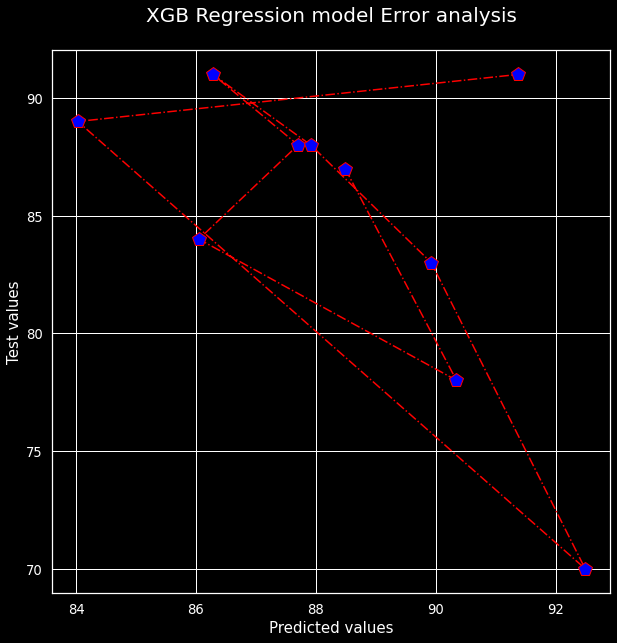

In [29]:
#XGB Regression model Error analysis

plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='Red',linestyle='dashdot',marker='p',markerfacecolor='blue',markersize=15)
plt.title('XGB Regression model Error analysis\n',fontsize=20)
plt.xlabel('Predicted values',fontsize=15)
plt.ylabel('Test values',fontsize=15)

**Ordinary least squares Linear Regression.**

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [30]:
#Using Linear Regression model.

LinReg = LinearRegression() #Define Model
LinReg.fit(X_train, y_train) #Fit Model
y_pred = LinReg.predict(X_test) #Get Predictions
print('Orginal Value \t Predicted Value')
for (orgVal, predVal) in zip(y_test, y_pred):
     print(f"\t{orgVal}\t\t{predVal:.2f}")
        
#Checking the accuracy of XGB Regression model
print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Orginal Value 	 Predicted Value
	87		85.71
	78		87.39
	84		86.10
	88		88.86
	91		86.12
	88		89.26
	83		90.49
	70		88.80
	89		88.80
	91		88.17

Mean Absolute Error: 4.911397402577341
Mean Squared Error: 53.82739404913433
Root Mean Squared Error: 7.336715480999269


Text(0, 0.5, 'Test values')

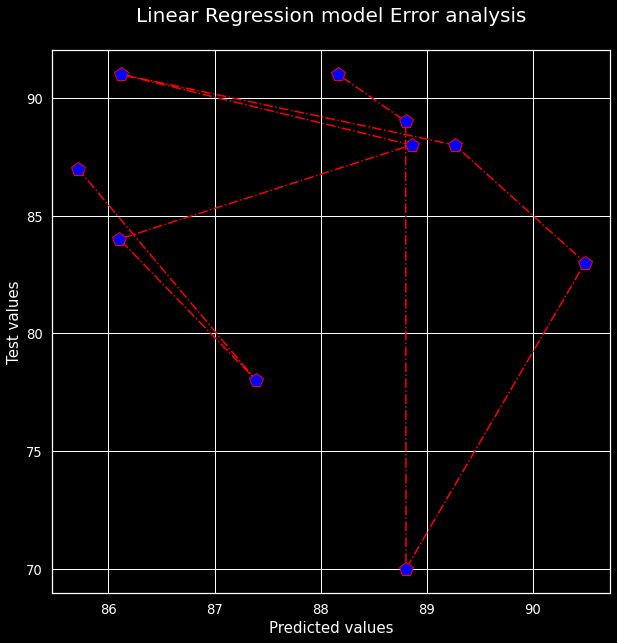

In [31]:
#Linear Regression model Error analysis

plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='Red',linestyle='dashdot',marker='p',markerfacecolor='blue',markersize=15)
plt.title('Linear Regression model Error analysis\n',fontsize=20)
plt.xlabel('Predicted values',fontsize=15)
plt.ylabel('Test values',fontsize=15)

**Reference**

https://www.kaggle.com/arpita28/analysis-of-spotify-trends

https://www.kaggle.com/duttasd28/spotify-theil-sen-cyberpunk-plotly


***If you like it Please Upvote!***

**Thanks!**